# Illustration of effects
Code in this jupyter notebook is used to illustrate the effects of concentration on resistance evolution discussed in Trubenova, B., Roizman, D., Moter, A., Rolff, J., and Regoes, R. R. (2022). Population genetics, biofilm recalcitrance, and antibiotic resistance evolution. Trends in Microbiology https://doi.org/10.1016/j.tim.2022.02.005

In [2]:
import sys
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import itertools
import imp
import biofilm_functions as bio

## Main function

In [3]:
def TrendsPaperSimulations(name= 'TrendsPaper_', concentration_gradient = [0], init_pla=500000, init_bio=500000, biofilm_benefit=0, biofilm_cost=0):
    start = time.time()
    
    print ('starting')
    
    ####### GENERAL PROPERTIES OF THE POPULATION ########
    loci=1
    mutation_rate=0.0000010
    cost_vector=[0.2]   #loc_costs = 0 * c_c * np.random.rand(k) + c_c
    benefit_vector=[2] 
    if len(cost_vector)>1 and len(cost_vector)<loci:
        print ('cost vector length does not match the number of loci')
    if len(benefit_vector)>1 and len(benefit_vector)<loci:
        print ('benefit vector length does not match the number of loci')

    psi_max_s=0.0231 
    psi_min=-0.0833
    gamma=0.00007
    release_rate=0#0.1
    adhesion_rate=0#0.1##0.00000001

    MIC = 1.0
    
    ######### PROPERTIES OF THE EXPERIMENT, INCLUDING THE DRUG PARAMETERS #######
    #### non of this matters for the red and green experiement?
    kappa=1.5
    cycle_length = 5*24 * 60  # length of a cycle in minutes
    init_conc = 2 * MIC  # intitial antibiotic concentration
    car_cap=10**9
    
    degradation_rate=-0.000060#-0.0006
    cycle_number=len(concentration_gradient)
    
    
    ########## SPECIFICS OF THIS EXPERIMENT #####################################
    ############ Starting population initialization  ###############

    living_style=0
    init_pop=np.zeros(2**loci)
    init_pop[0]=init_pla  #
    init_pop[1]=init_pla
    my_pla_population=bio.Bacterial_population(init_pop,loci=loci,psi_max_s=psi_max_s, psi_min=psi_min, gamma=gamma, MIC = MIC, cost_vector=cost_vector,benefit_vector=benefit_vector, mutation_rate=mutation_rate, living_style=living_style, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost, release_rate=release_rate, adhesion_rate=adhesion_rate)
    print ('z_mic plankton:', my_pla_population.z_mic)
    
    living_style=1
    init_pop=np.zeros(2**loci)
    init_pop[0]=init_bio
    init_pop[1]=init_bio
    my_bio_population=bio.Bacterial_population(init_pop,loci=loci,psi_max_s=psi_max_s, psi_min=psi_min, gamma=gamma, MIC = MIC, cost_vector=cost_vector,benefit_vector=benefit_vector, mutation_rate=mutation_rate, living_style=living_style, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost, release_rate=release_rate, adhesion_rate=adhesion_rate)
    print ('z_mic biofilm:', my_bio_population.z_mic)

    my_treatment=bio.Treatment(concentration_gradient, cycle_length=cycle_length , cycle_number=cycle_number, car_cap=car_cap,kappa=kappa, degradation_rate=degradation_rate)

    #Run this 
    my_treatment.run_stochastic_simulation(my_pla_population, my_bio_population)
    my_treatment.plot_results() 
    
    end = time.time()
    print ('finished in ', end - start)
    my_treatment.save_output(name)
    return (my_treatment.pla_population_record,my_treatment.pla_population_record, my_treatment.time, my_treatment.concentration_record)

## Running the simulations for specific parameters

In [7]:
imp.reload(bio)
biofilm_benefit=10
biofilm_cost=0.5
R=1  # CHANGE THIS FOR MULTIPLE REPEATS

running simulation no: 0
starting
z_mic plankton: [1. 2.]
z_mic biofilm: [11. 12.]
running stochastic simulation
initiated
[[ 1.  0. -1. -1. -0.  0.  0. -0. -0. -0.  1.  0. -1.  0.]
 [ 0.  1.  1. -0. -1.  0.  0.  0. -0. -0.  0.  1.  0. -1.]
 [ 0.  0. -0. -0. -0.  1.  0. -1. -1. -0. -1.  0.  1.  0.]
 [ 0.  0.  0. -0. -0.  0.  1.  1. -0. -1.  0. -1.  0.  1.]]


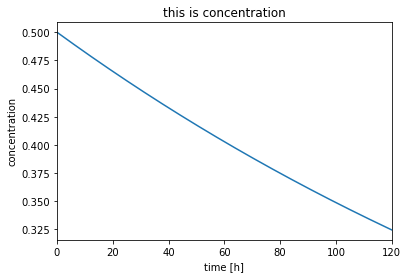

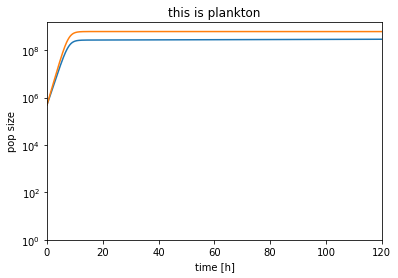

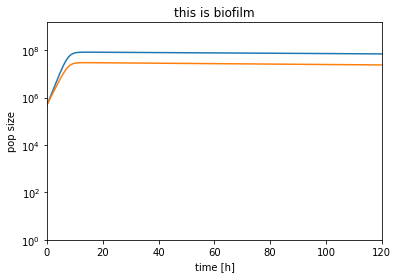

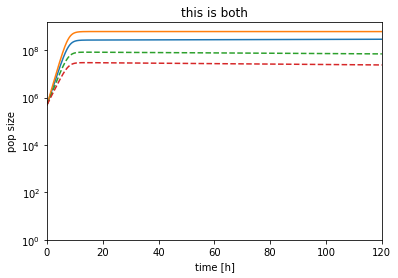

finished in  1.7702481746673584
all saved as TP_A0


In [17]:
concentration_gradient=[.5]
name='TP_A'
for i in range (R):
    print ('running simulation no:',i)
    [plankton_p, biofilm_p, time_r, conc_r]=TrendsPaperSimulations(name=name+str(i), concentration_gradient = concentration_gradient, init_pla=500000, init_bio=500000, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost)
    np.savetxt(name+str(i)+'_time.txt', time_r)
    np.savetxt(name+str(i)+'_conc.txt', conc_r)


running simulation no: 0
starting
z_mic plankton: [1. 2.]
z_mic biofilm: [11. 12.]
running stochastic simulation
initiated
[[ 1.  0. -1. -1. -0.  0.  0. -0. -0. -0.  1.  0. -1.  0.]
 [ 0.  1.  1. -0. -1.  0.  0.  0. -0. -0.  0.  1.  0. -1.]
 [ 0.  0. -0. -0. -0.  1.  0. -1. -1. -0. -1.  0.  1.  0.]
 [ 0.  0.  0. -0. -0.  0.  1.  1. -0. -1.  0. -1.  0.  1.]]


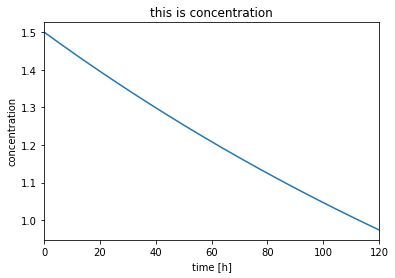

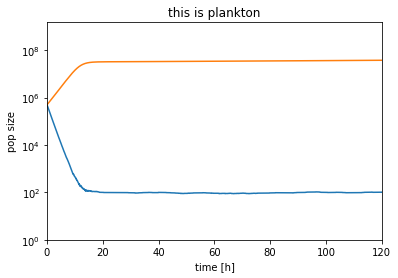

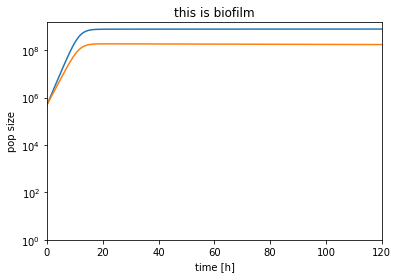

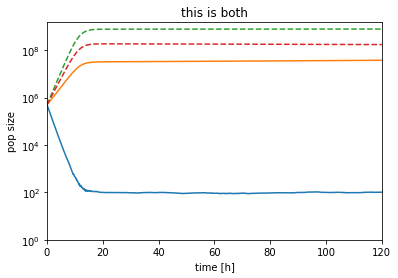

finished in  1.7343990802764893
all saved as TP_B0


In [9]:
concentration_gradient=[1.5]  
name='TP_B'
for i in range (R):
    print ('running simulation no:',i)
    [plankton_p, biofilm_p, time_r, conc_r]=TrendsPaperSimulations(name=name+str(i), concentration_gradient = concentration_gradient, init_pla=500000, init_bio=500000, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost)
    np.savetxt(name+str(i)+'_time.txt', time_r)
    np.savetxt(name+str(i)+'_conc.txt', conc_r)

running simulation no: 0
starting
z_mic plankton: [1. 2.]
z_mic biofilm: [11. 12.]
running stochastic simulation
initiated
[[ 1.  0. -1. -1. -0.  0.  0. -0. -0. -0.  1.  0. -1.  0.]
 [ 0.  1.  1. -0. -1.  0.  0.  0. -0. -0.  0.  1.  0. -1.]
 [ 0.  0. -0. -0. -0.  1.  0. -1. -1. -0. -1.  0.  1.  0.]
 [ 0.  0.  0. -0. -0.  0.  1.  1. -0. -1.  0. -1.  0.  1.]]


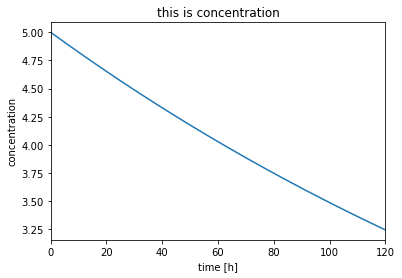

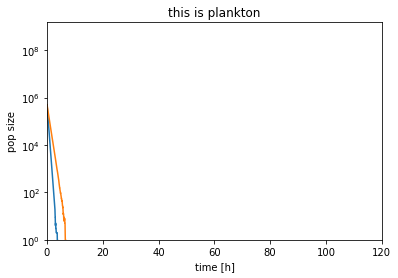

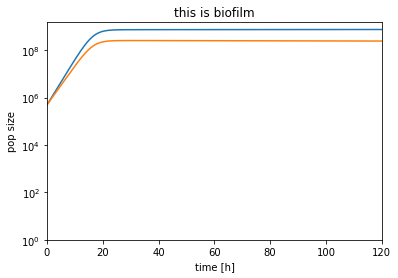

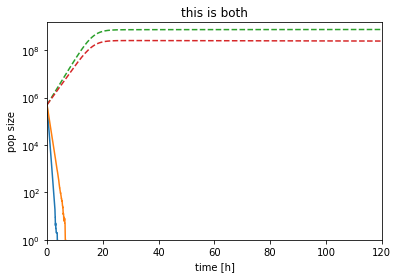

finished in  1.7723290920257568
all saved as TP_C0


In [10]:
concentration_gradient=[5]  
name='TP_C'
for i in range (R):
    print ('running simulation no:',i)
    [plankton_p, biofilm_p, time_r, conc_r]=TrendsPaperSimulations(name=name+str(i), concentration_gradient = concentration_gradient, init_pla=500000, init_bio=500000, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost)
    np.savetxt(name+str(i)+'_time.txt', time_r)
    np.savetxt(name+str(i)+'_conc.txt', conc_r)

running simulation no: 0
starting
z_mic plankton: [1. 2.]
z_mic biofilm: [11. 12.]
running stochastic simulation
initiated
[[ 1.  0. -1. -1. -0.  0.  0. -0. -0. -0.  1.  0. -1.  0.]
 [ 0.  1.  1. -0. -1.  0.  0.  0. -0. -0.  0.  1.  0. -1.]
 [ 0.  0. -0. -0. -0.  1.  0. -1. -1. -0. -1.  0.  1.  0.]
 [ 0.  0.  0. -0. -0.  0.  1.  1. -0. -1.  0. -1.  0.  1.]]


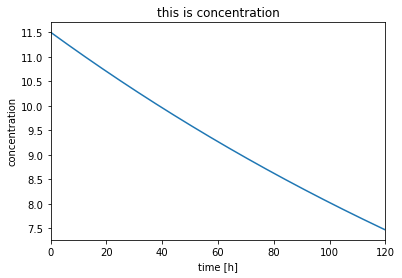

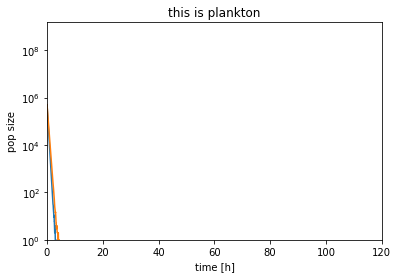

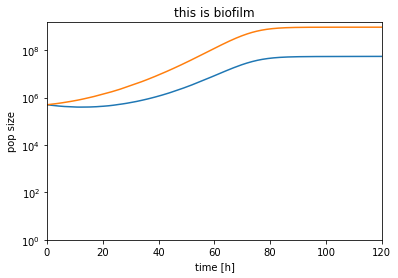

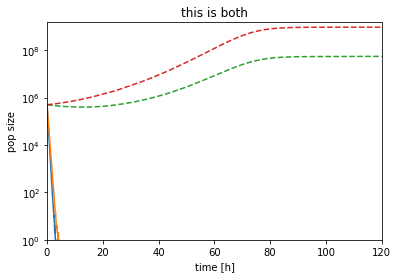

finished in  1.9194788932800293
all saved as TP_D0


In [11]:
concentration_gradient=[11.5]
name='TP_D'
for i in range (R):
    print ('running simulation no:',i)
    [plankton_p, biofilm_p, time_r, conc_r]=TrendsPaperSimulations(name=name+str(i), concentration_gradient = concentration_gradient, init_pla=500000, init_bio=500000, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost)
    np.savetxt(name+str(i)+'_time.txt', time_r)
    np.savetxt(name+str(i)+'_conc.txt', conc_r)

running simulation no: 0
starting
z_mic plankton: [1. 2.]
z_mic biofilm: [11. 12.]
running stochastic simulation
initiated
[[ 1.  0. -1. -1. -0.  0.  0. -0. -0. -0.  1.  0. -1.  0.]
 [ 0.  1.  1. -0. -1.  0.  0.  0. -0. -0.  0.  1.  0. -1.]
 [ 0.  0. -0. -0. -0.  1.  0. -1. -1. -0. -1.  0.  1.  0.]
 [ 0.  0.  0. -0. -0.  0.  1.  1. -0. -1.  0. -1.  0.  1.]]
propensities are 0


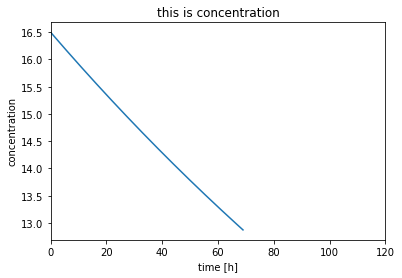

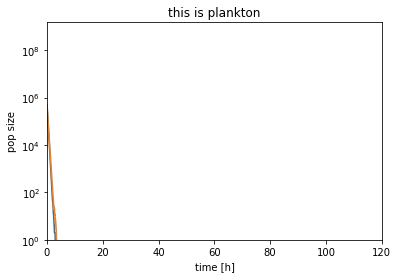

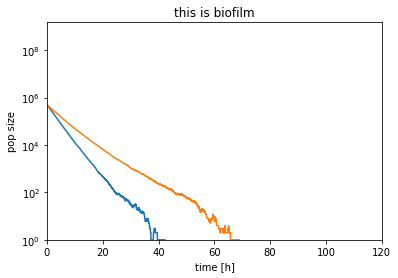

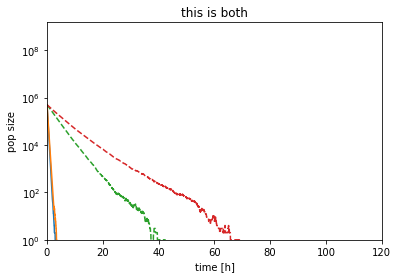

finished in  1.3421082496643066
all saved as TP_E0


In [12]:
concentration_gradient=[16.5]
name='TP_E'
for i in range (R):
    print ('running simulation no:',i)
    [plankton_p, biofilm_p, time_r, conc_r]=TrendsPaperSimulations(name=name+str(i), concentration_gradient = concentration_gradient, init_pla=500000, init_bio=500000, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost)
    np.savetxt(name+str(i)+'_time.txt', time_r)
    np.savetxt(name+str(i)+'_conc.txt', conc_r)

## Plotting the results: 

In [13]:
def plot_simple_dynamics(name='', N=1):
    savename0=name+'F'
    fig1, ax1 = plt.subplots(dpi=200, figsize=(7, 2))
    ax1.set_prop_cycle('color', [plt.cm.jet(i) for i in np.linspace(0, 1, 2)])

    for i in range (N):
        loadname=name+str(i)
        this_time=np.loadtxt(loadname+'_time.txt')
        this_time=this_time/60
        this_conc=np.loadtxt(loadname+'_conc.txt')
        dynamics_pla=np.loadtxt(loadname+'_pla_pop.txt')
        plt.semilogy(this_time, dynamics_pla, alpha=0.1)
        #plt.semilogy(dynamics_pla, alpha=0.1)
    plt.xlabel('Time [h]')
    plt.ylabel('N')
   
    for i in range (N):
        loadname=name+str(i)
        this_time=np.loadtxt(loadname+'_time.txt')
        this_time=this_time/60
        #this_conc=np.loadtxt(loadname+'_conc.txt')
        dynamics_bio=np.loadtxt(loadname+'_bio_pop.txt')
        plt.semilogy(this_time, dynamics_bio, ':', alpha=0.3)
        #plt.semilogy( dynamics_bio, alpha=0.3)
    #plt.title('Biofilm')
    plt.xlabel('Time [h]')
    plt.ylabel('N')
    plt.ylim(1,5*10**9)
    #plt.xlim(0,7)
    plt.xlim(0,5*24)
    plt.savefig('00'+name+'FigDyn.png', dpi=200,bbox_inches='tight')
    fig1.show()

    print ('all done')

all done


<ipython-input-13-a01511ee86e8>:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


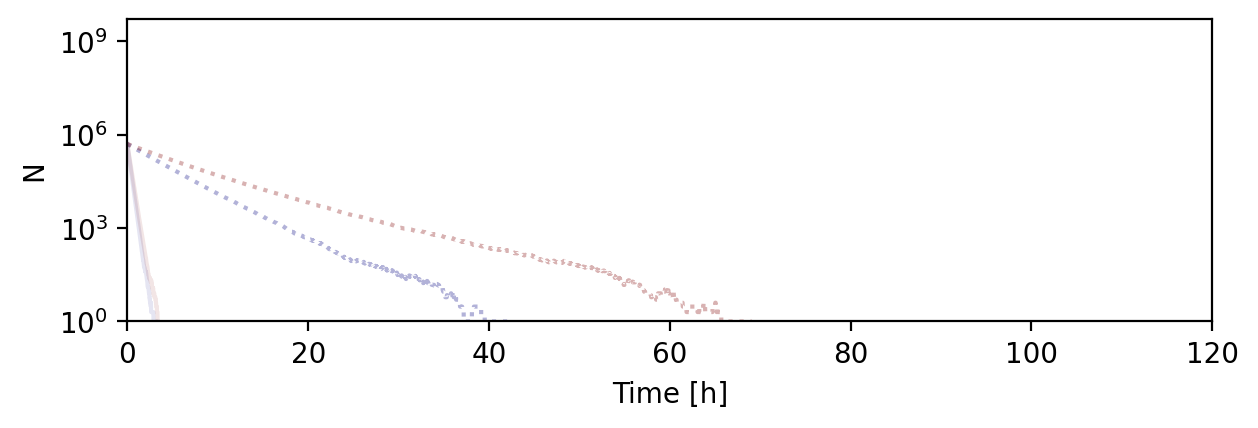

In [21]:
name='TP_E'
R=1  #CHANGE THIS FOR MULTIPLE REPEATS
plot_simple_dynamics(name=name, N=R)